# Project for Machine Learning

Importiamo le info dal csv con pandas

In [1]:
import pandas
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

def unique(column):
    x = np.array(column)
    print(np.unique(x))

file=pandas.read_csv('BlackFriday.csv')
#file['Stay_In_Current_City_Years'].value_counts()
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [2]:
file.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


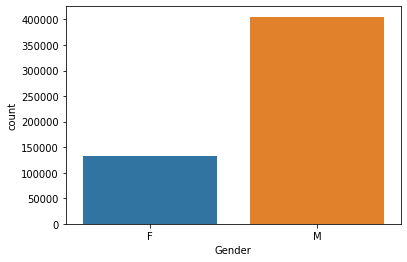

In [3]:
sns.countplot(file['Gender'])

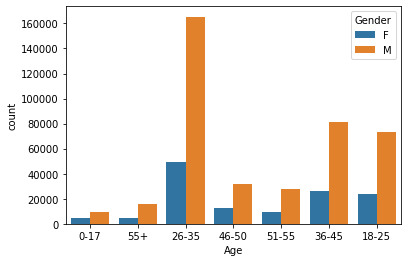

In [4]:
sns.countplot(file['Age'], hue=file['Gender'])

In [5]:
file['User_ID'].nunique()

5891

In [6]:
unique(file['Occupation'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [7]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(file[file['Occupation'] == oid]['Purchase'].sum())

spent_money



[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359,
 300672105,
 71135744,
 255594745,
 116540026,
 234442330,
 387240355,
 60249706,
 73115489,
 292276985]

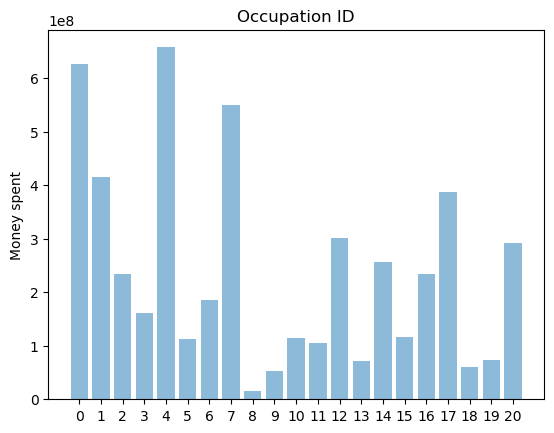

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

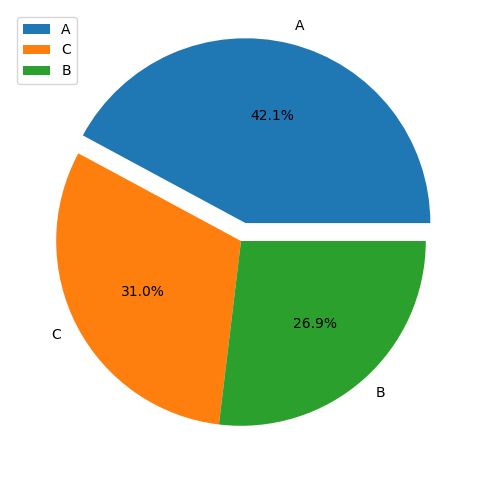

In [9]:
file['City_Category'].nunique()

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(file['City_Category'].value_counts(), explode=explode, labels=file['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

In [10]:
#file = file.drop(['Product_Category_3'], axis=1) <--wtf is this shit
file = file.drop(['User_ID','Product_ID', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(4), object(4)
memory usage: 32.8+ MB


In [12]:
df_Gender = pd.get_dummies(file['Gender'])
df_Age = pd.get_dummies(file['Age'])
df_City_Category = pd.get_dummies(file['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(file['Stay_In_Current_City_Years'])

file_final = pd.concat([file, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

file_final.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,F,M,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,8370,1,0,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,15200,1,0,...,0,0,1,0,0,0,0,1,0,0


il tipo del contenuto del file ritengo che la categoria del prodotto 1 sia una sopracategoria del 2, e così via.
Ipotizzo questo perchè i dati sono sempre presenti nella prima categoria e poi nelle altre.

In [13]:
X = file_final[['Occupation', 'Marital_Status','Product_Category_1', 'F', 'M', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]
y = file_final['Purchase']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [15]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 382996792356944.9
                     Coefficient
Occupation          6.011233e+00
Marital_Status     -5.701115e+01
Product_Category_1 -4.169276e+02
F                  -7.369969e+11
M                  -7.369969e+11
0-17                1.106815e+13
18-25               1.106815e+13
26-35               1.106815e+13
36-45               1.106815e+13
46-50               1.106815e+13
51-55               1.106815e+13
55+                 1.106815e+13
A                  -8.717308e+14
B                  -8.717308e+14
C                  -8.717308e+14
0                   4.784029e+14
1                   4.784029e+14
2                   4.784029e+14
3                   4.784029e+14
4+                  4.784029e+14


In [16]:
predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 9581.6875  8972.8125  6730.5625 ... 10330.6875 11078.3125  8582.0625]


In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3629.936024631332
MSE: 22311063.46251905


ValueError: Could not interpret input 'Gender'

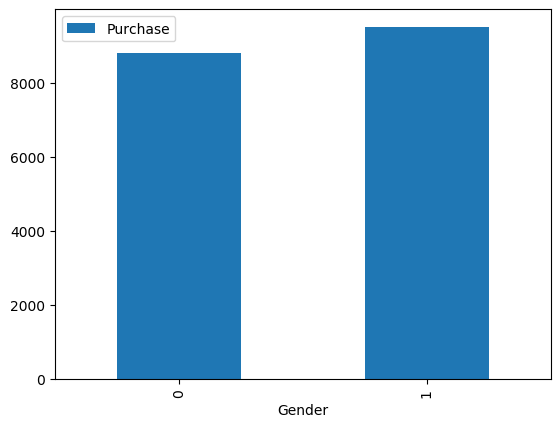

In [18]:


def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
file['Gender'] = file['Gender'].apply(map_gender)


file[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', file = file)
plt.show()